In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

## 1) Problem Statement

- Predict behavior to retain customers

## 2) Data Gathering

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3) EDA

- Insights

- Shape of the data :
    - rows >    7043
    - columns > 21
    
- Finding missing values:
    - TotalCharges >> 11 Missing value presen
    
- Count of categorical column is 18
- Categorical columns are > ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

- Count of numericla columns is 3
- Numerical columns are > ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

- Outliers 
- Outliers Status >> No Outliers

- unique value & value counts of categorical column
- gender
- Male      3555
- Female    3488
- Name: count, dtype: int64
- **************************************************
- Partner
- No     3641
- Yes    3402
- Name: count, dtype: int64
- **************************************************
- Dependents
- No     4933
- Yes    2110
- Name: count, dtype: int64
- **************************************************
- PhoneService
- Yes    6361
- No      682
- Name: count, dtype: int64
- **************************************************
- MultipleLines
- No                  3390
- Yes                 2971
- No phone service     682
- Name: count, dtype: int64
- **************************************************
- InternetService
- Fiber optic    3096
- DSL            2421
- No             1526
- Name: count, dtype: int64
- **************************************************
- OnlineSecurity
- No                     3498
- Yes                    2019
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- OnlineBackup
- No                     3088
- Yes                    2429
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- DeviceProtection
- No                     3095
- Yes                    2422
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- TechSupport
- No                     3473
- Yes                    2044
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- StreamingTV
- No                     2810
- Yes                    2707
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- StreamingMovies
- No                     2785
- Yes                    2732
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- Contract
- Month-to-month    3875
- Two year          1695
- One year          1473
- Name: count, dtype: int64
- **************************************************
- PaperlessBilling
- Yes    4171
- No     2872
- Name: count, dtype: int64
- **************************************************
- PaymentMethod
- Electronic check             2365
- Mailed check                 1612
- Bank transfer (automatic)    1544
- Credit card (automatic)      1522
- Name: count, dtype: int64
- **************************************************
- TotalCharges
-           11
- 20.2      11
- 19.75      9
- 20.05      8
- 19.9       8
          ..
- 6849.4     1
- 692.35     1
- 130.15     1
- 3211.9     1
- 6844.5     1
- Name: count, Length: 6531, dtype: int64
- **************************************************
- Churn
- No     5174
- Yes    1869
- Name: count, dtype: int64

- ################################################### Shpe of the Data ####################################################

- rows >    7043
- columns > 21

In [3]:
df.shape

(7043, 21)

#### 3.1 Finding missing  values

- ################################################# finding missing value #################################################

- No missing value present in data

In [4]:
df.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- ############################################ Information ################################################################

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- ################################ Categorical column #####################################################################

- Count of categorical column is 18
- Categorical columns are > ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges','Churn']

In [6]:
cat_feature = [i for i in df.columns if df.dtypes[i] == "object"]
df[cat_feature].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [7]:
df[cat_feature].shape

(7043, 18)

In [8]:
df[cat_feature].columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

- ############################################# Numerical columns #########################################################

- Count of numericla columns is 3
- Numerical columns are > ['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [9]:
df._get_numeric_data()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [10]:
df._get_numeric_data().shape

(7043, 3)

In [11]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

- ############################################ Outliers ###################################################################

- Outliers Status >> No Outliers

In [12]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

<AxesSubplot:xlabel='tenure'>

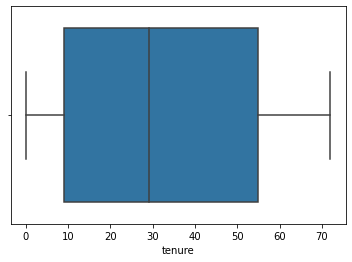

In [13]:
sns.boxplot(x = df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges'>

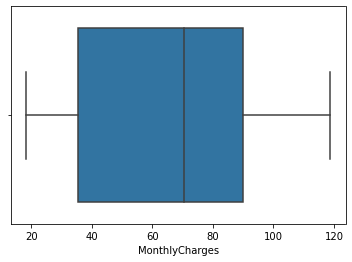

In [14]:
sns.boxplot(x = df["MonthlyCharges"])

- ############################################# Correlation checking #######################################################

In [15]:
df1 = df._get_numeric_data()

In [16]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

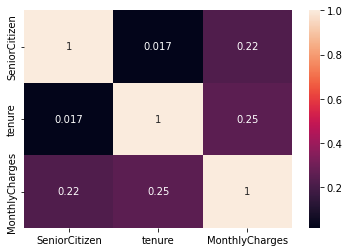

In [17]:
sns.heatmap(df1.corr(),annot=True)

- ############################### unique value & value counts of categorical column ########################################

In [18]:
df.select_dtypes(include="object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [19]:
lst = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for i in lst:
#     print(i)
    print(df[i].value_counts())
    print("*"*50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**************************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**************************************************
OnlineBackup
No                     3088
Yes            

- ####################################### unique of numerical column ######################################################

In [20]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [21]:
lst = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
for i in lst:
    print(f"{i}")
    print(df[i].unique())
    print("*"*50)

SeniorCitizen
[0 1]
**************************************************
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
**************************************************


- ####################################################      ##############################################################

- On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that

- TotalCharges >> 11 Missing value present

In [22]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
